

# Project: Movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project I will be analyzing movies data records in which a group of data related to movies are presented in columns.By analyzing this data I am looking for trends among this data ,which gives some clues about features of famous movies and other points.
>
> First I download the data into a pandas DataFrame and start the process of checking this data and pose some quistins that need to be explored and answered.After getting my self familiar with data I start to handle this data  .By cleaning  data and make a check for its concistency , I could move to implement and answer my questions which are:

   1: In which year is profit the highest among all years (the difference between the revenue and the  budget  ) ?

   2: Do the movies with high budget get a high popoularity in return??

   3: Does the length of a movie have a positive or negative impact on the audience (Popularity)?

   4: What is the type of movies that produced the maximum average revenue in all years?


In [798]:
# I started by importing all necessory librarys that are required to finish the report.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this part I will  load the csv file into my pandas DataFrame, so that I can take a deep look at data to see if some are missing or duplicated.

### General Properties

In [799]:
#I faced a problem in loading csv file directly when put in the current folder that is why I used the full path to the file
df_movies =pd.read_csv('C:/users/sakhr/desktop/Investigate_dataset/tmdb_movies.csv')
df_movies.head()  # print some data from the begining



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [800]:
df_movies.shape 
# get the dataset dimensions


(10866, 21)

In [801]:
# see what are the types of columns that are used
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [802]:
df_movies.describe()    # get some perspective about the data 
# get some clue about discriptive statstics (mean, median and Quartiles)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [803]:
df_movies.duplicated().value_counts()   # get the dataset duplicated elements

False    10865
True         1
dtype: int64

In [804]:
df_movies.nunique()   # see how much data is unique for each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [805]:
df_movies.info()   # get how many  null dataset  elements for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Replace this with more specific notes!)

- It appears to be many columns are not important in finishing my analysis considering that they are not affecting my quistions explorations.That is why I am droping them.

In [806]:
df_movies.drop(['homepage','tagline','keywords','overview','imdb_id','production_companies','revenue_adj','budget_adj'],axis = 1 ,inplace = True)  # delete the unimportant columns
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015


In [807]:
# checking again for null values
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [808]:

df_movies.dropna(inplace = True)  # dropping the null values since most of them are text elements 



In [809]:
#checking again for any null value
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 13 columns):
id                10732 non-null int64
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now I will explore data according to my quiestions bby moving step by step tword answering those quiestions

### Research Question 1 (How the relation goes between the money spent on producing movies and the revinue from those movies?!)

To answer this question, I will start by grouping by 'release_year' and find the average for budget and revenue for all movies during each year

In [810]:
#first creat new DataFrame and store the year and the mean budget and revenue corresponding to each year
df_year_outcome=df_movies.groupby('release_year').mean()[['budget','revenue']]

df_year_outcome['release_year']=df_movies.groupby('release_year').groups    # since 'releas_year' column has not been added automatically to the dataframe 
#   I added it by code by grouping all unique years in the main dataset and insert it as new column to the new dataset

df_year_outcome['total_outcome']=df1['revenue']-df1['budget'] # here I calculated the net profit and insert it as new column


In [811]:
df_year_outcome     # checking the new dataframe

,budget,revenue,release_year,total_outcome
release_year,,,,
1960,6.892796e+05,4.531406e+06,1960,3.842127e+06
1961,1.488290e+06,1.089420e+07,1961,9.405909e+06
1962,1.710066e+06,6.736870e+06,1962,5.026804e+06
1963,2.156809e+06,5.511911e+06,1963,3.355103e+06
1964,9.400753e+05,8.118614e+06,1964,7.178539e+06
1965,2.005860e+06,1.308805e+07,1965,1.108219e+07
1966,1.251191e+06,1.842102e+06,1966,5.909106e+05
1967,2.648737e+06,1.941670e+07,1967,1.676796e+07
1968,1.893132e+06,6.966657e+06,1968,5.073526e+06


Ploting the result:
According to the analysis 1995 has witnessed the largest average profit of movies according to this dataset records.

Text(0, 0.5, 'Average outcome of movies')

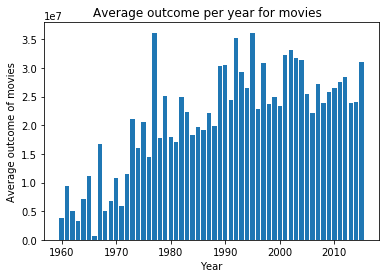

In [812]:

#plot the relation between each year and the correspondence average profit

plt.bar(df_year_outcome['release_year'], df_year_outcome['total_outcome'])
plt.title("Average outcome per year for movies  ")
plt.xlabel("Year")
plt.ylabel("Average outcome of movies")

In [813]:
avg_outcome=df_year_outcome['total_outcome'].max()  # find the maximum average profit
year_of_max=df_year_outcome[df_year_outcome['total_outcome'] == avg_outcome]['release_year'] # find the year of maximum profit

avg_outcome,year_of_max # as it is clear here the year of max profit


(36152050.477011494, release_year
 1995    1995
 Name: release_year, dtype: int32)

### Research Question 2  (Do the movies with high budget get a high popoularity in return?)

To answer this question,first I will split the main dataframe into two dataframes according to popularity of movies, 
so two types of popularity will be created low popular movies ,which are the movies that have popularity  less than the median popularity value,
 and the high popular movies ,which are the movies that have popularity  more than the median

In [814]:
median = df_movies['popularity'].median()  # first I will find the median popularity
low = df_movies.query('popularity < {}'.format(median))  # create  low popular movies
high = df_movies.query('popularity >= {}'.format(median)) # create  high popular movies

mean_budget_low = low['budget'].mean()   # find the average budget for "low popular movies"
mean_budget_high = high['budget'].mean()  # find the average budget for "high popular movies"

Now plot the result to show the result clearly, which is:
Movies that are rank high in popularity required high average budget .In contrast, movies which are less popular cost less aveage budget .


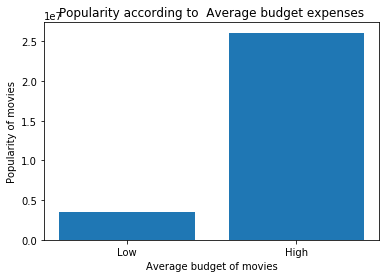

In [815]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Popularity according to  Average budget expenses')
plt.xlabel('Average budget of movies')
plt.ylabel('Popularity of movies');

### Research Question 3  (Does the length of a movie have a positive or negative impact on the audience (Popularity)?)

To answer this question, I will divide the length of movies into four groups to make it easy to deal with them and find some trends among them.

In [816]:
df_movies.describe()  # First check the max and min length of movies 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10732.000000,10732.000000,1.073200e+04,1.073200e+04,10732.000000,10732.000000,10732.000000,10732.000000
mean,65199.598025,0.652609,1.480506e+07,4.031622e+07,102.467853,219.802739,5.964620,2001.260436
std,91466.515616,1.004757,3.106345e+07,1.176476e+08,30.492619,578.789325,0.930286,12.819831
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.750000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20331.000000,0.387136,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73943.750000,0.720621,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [817]:
# "cut" the data into groups according to the min,20%,50%,75%,max values
bin_edges = [ 0.000000, 90.000000,100.000000 ,112.000000,877.000000 ] 

In [818]:
# time interval names
bin_names = ['Short' ,'Medium' , 'Moderately Long','Long' ]

In [819]:
# Create new column that will match each value of runtime and put its corresponding time interval in the new column
df_movies['length_state'] = pd.cut(df_movies['runtime'], bin_edges, labels=bin_names)

# Checks data with time interval column column
df_movies.tail(20)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,length_state
10846,17102,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,Terence Fisher,90,Horror,1/9/1966,16,5.7,1966,Short
10847,28763,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,Terence Fisher,89,Science Fiction|Horror,6/20/1966,13,5.3,1966,Short
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,8/24/1966,42,6.7,1966,Medium
10849,28270,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,Ronald Neame,109,Action|Comedy|Crime,12/16/1966,14,6.1,1966,Moderately Long
10850,26268,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,Jack Smight,121,Action|Drama|Thriller|Crime|Mystery,2/23/1966,14,6.0,1966,Long
10851,15347,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,James Hill,95,Adventure|Drama|Action|Family|Foreign,6/22/1966,15,6.6,1966,Medium
10852,37301,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,Fielder Cook,95,Western,5/31/1966,11,6.0,1966,Medium
10853,15598,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,Lewis Gilbert,114,Comedy|Drama|Romance,3/29/1966,26,6.2,1966,Long
10854,31602,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,Arthur Penn,135,Thriller|Drama|Crime,2/17/1966,17,6.0,1966,Long
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,90,Comedy|Family|Mystery|Romance,1/20/1966,14,6.1,1966,Short


In [820]:
# Find the mean popularity of each Length interval by using  groupby
mean_popularity_per_length=df_movies.groupby('length_state')['popularity'].mean()
mean_popularity_per_length


length_state
Short              0.418723
Medium             0.557768
Moderately Long    0.663235
Long               1.020148
Name: popularity, dtype: float64

In [821]:
# Using groupby to get the mean popularity  for each time interval group
Short_time=mean_popularity_per_length['Short']
Long_time=mean_popularity_per_length['Long']
medium_time=mean_popularity_per_length['Medium']
mod_long_time=mean_popularity_per_length['Moderately Long']

Short_time,Long_time,medium_time,mod_long_time

(0.41872271956368806,
 1.020147640188753,
 0.5577679592180652,
 0.6632349642705231)

By ploting the result it is clear that:
Short movies (0-90 minutes) has the minimum average popularity among all groups.And the longest movies(112-877 minutes) are the most popular movies with highest average popularity, according the given data)

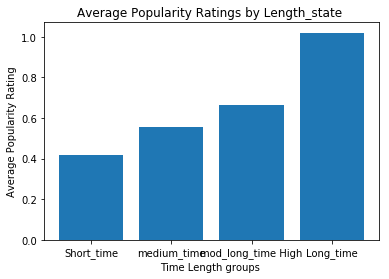

In [822]:
# Create a bar chart with proper labels
locations = [1, 2,3,4]
heights = [Short_time,medium_time,mod_long_time,Long_time]

labels = ['Short_time','medium_time','mod_long_time High', 'Long_time']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity Ratings by Length_state ')
plt.xlabel('Time Length groups ')
plt.ylabel('Average Popularity Rating');


### Research Question 4  (What is the type of movies that produced the maximum average of revenue in all years?)

To answer this question we need to go in this steps:

1:Determine what are the movies geners 

2:Add new column for each type of movie

3:Determine average revenue for each type of movie 




### First :Determine what are the movies geners

The function to_columns is responsible of determining the movies types. By receiving 'genres' column as input it return a list with all movie types.

In [823]:
# a function to get the movies types  from genres column
def to_columns(column_data):
    d=column_data

    b=[]
    for c in d:      # loop through the 'genres' column 
        f=c.split('|')   # split the types that are seprated by '|'
        b.append(f)
    flat_list = []  #  will contain all types redunduntly
    for sublist in b:  # loop through each  row value of the column to store each value  in flat_list
        for item in sublist:
            flat_list.append(item)
        
    mylist = list(set(flat_list))  # eliminate all redunduncy and just keep the unique types
    return mylist
    

In [824]:

column_names=np.array(to_columns(df_movies['genres']))  # use numpy array to store all the movie types comming back from the function
column_names

array(['Adventure', 'Music', 'War', 'Science Fiction', 'History',
       'Documentary', 'Crime', 'Fantasy', 'Action', 'Drama', 'Comedy',
       'Mystery', 'Animation', 'Foreign', 'Thriller', 'TV Movie',
       'Family', 'Horror', 'Romance', 'Western'], dtype='<U15')

### 2:Add new column for each type of movie

Add new column for each type of movie in the main dataframe, and store in it '1' if that movie fall in that type or '0' if it is not 

In [825]:
for s in column_names:
    df_movies[s] = df_movies['genres'].apply(lambda x: 1 if s in x else 0) # I used lamda expression to make it easy
    #to craete and put data in the columns in the same time


In [826]:
df_movies.head()  # make sure that columns have been created 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,...,Comedy,Mystery,Animation,Foreign,Thriller,TV Movie,Family,Horror,Romance,Western
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,...,0,0,0,0,1,0,0,0,0,0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,...,0,0,0,0,1,0,0,0,0,0
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,...,0,0,0,0,1,0,0,0,0,0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,...,0,0,0,0,0,0,0,0,0,0
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,...,0,0,0,0,1,0,0,0,0,0


### 3:Determine average revenue for each type of movie


Create 'df_final' which will contain the movie type and the average revinue corresponding to that type.

In [827]:

rows=[]  #  represent rows of the new dataframe 

for c in column_names:  #  movie types numpy array
    
    rows.append([c,df_movies.groupby(c)['revenue'].mean()[1]])  # pich the case when movie type column is '1' and ignore the case when it is '0'

df_final = pd.DataFrame(rows,columns=['genre','avg_revenue']) # fill the 'df_final' dataframe with intended data 
df_final.describe()


,avg_revenue
count,2.000000e+01
mean,4.466637e+07
std,3.117716e+07
min,2.592593e+05
25%,2.909678e+07
50%,3.900969e+07
75%,7.115973e+07
max,1.136012e+08


By ploting the results it is clear that:
Adventure movie type has brought the highest average revinue ,according to given data, thaen comes the fantasy type of movies.

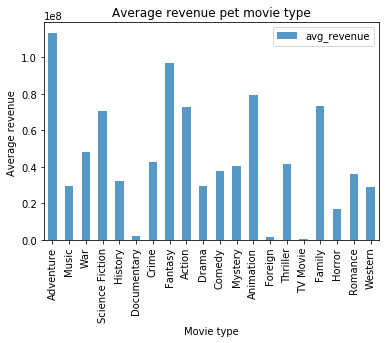

In [828]:

df_final.set_index(["genre"],inplace=True)
df_final.plot(kind='bar',alpha=0.75)

plt.title('Average revenue pet movie type')
plt.xlabel('Movie type')
plt.ylabel('Average revenue ');





<a id='conclusions'></a>
## Conclusions

According to the analysis:

1:average profit of movies per years is not steady in some years like 1995 it was the highest and other were less.

2:Movies with high budget and mony expenses are more likely to be the most popular and accepted amony audience.

3:The longest the movie the most popular the movie.

4:Adventurous kind of movies are producing more revinue than other movie types fantasy type comes second.